In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc, plot_confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# DATA CLEANSING & Preprocessing

In [2]:
data=pd.read_csv('nba_players.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


memeriksa null dan data type tiap kolom

In [3]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rati

menghapus kolom yang tidak memberikan keterangan apapun

In [4]:

data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

Melihat jumlah potensial player

&lt;AxesSubplot:xlabel=&#39;potential_player&#39;, ylabel=&#39;count&#39;&gt;

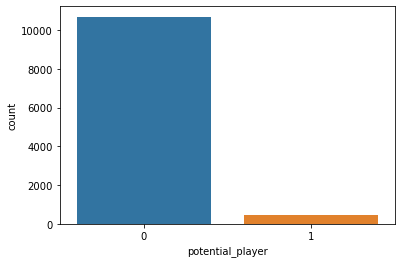

In [5]:
sns.countplot('potential_player',data=data)

In [6]:
data['potential_player'].value_counts(normalize=True)

0    0.959175
1    0.040825
Name: potential_player, dtype: float64

melihat jumlah di atas jumlah pemain yang tidak potensial mencapai 95% sedangkan yang memiliki potensi sekitar 4%

In [31]:
data['ura']=pd.cut(data['age'],4)

(array([0, 1, 2, 3]),
 [Text(0, 0, &#39;(17.974, 24.5]&#39;),
  Text(1, 0, &#39;(24.5, 31.0]&#39;),
  Text(2, 0, &#39;(31.0, 37.5]&#39;),
  Text(3, 0, &#39;(37.5, 44.0]&#39;)])

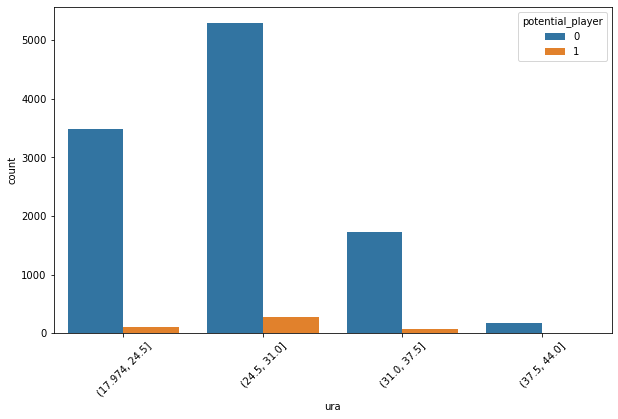

In [32]:
plt.figure(figsize=(10,6))
sns.countplot('ura',hue='potential_player',data=data)
plt.xticks(rotation=45)

menurut grafik di atas pemain dengan rentang usia 25-31 tahun memiliki pemain yang berpotensi lebih banyak dibanding yang lainnya.

kebanyakan pemain pun berada di rentang tersebut. 

pemain dengan rentang usia di bawah 25 tahun berjumlah lebih sedikit daripada pemain yang berada pada rentang 25-31. mungkin pelatihan pemain di bawah 25 tahun kurang dioptimalisasi sehingga distribusi pemain terlihat lebih banyak pada rentang usia 25 tahun ke atas

In [21]:
data['ph']=pd.cut(data['player_height'],5)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, &#39;(159.949, 174.244]&#39;),
  Text(1, 0, &#39;(174.244, 188.468]&#39;),
  Text(2, 0, &#39;(188.468, 202.692]&#39;),
  Text(3, 0, &#39;(202.692, 216.916]&#39;),
  Text(4, 0, &#39;(216.916, 231.14]&#39;)])

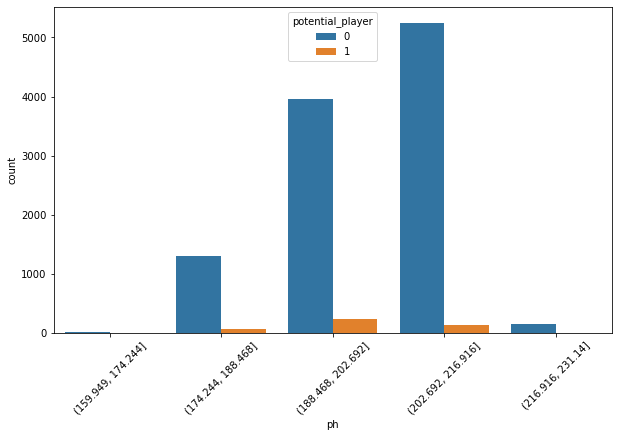

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('ph',hue='potential_player',data=data)
plt.xticks(rotation=45)

melihat grafik di atas pemain dengan rentang tinggi di antara 188-202 memiliki jumlah pemain berpotensi lebih tinggi, namun kebanyakan pemain berada pada rentang 202-216 cm.

In [24]:
data['pw']=pd.cut(data['player_weight'],5)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, &#39;(60.225, 80.921]&#39;),
  Text(1, 0, &#39;(80.921, 101.514]&#39;),
  Text(2, 0, &#39;(101.514, 122.107]&#39;),
  Text(3, 0, &#39;(122.107, 142.7]&#39;),
  Text(4, 0, &#39;(142.7, 163.293]&#39;)])

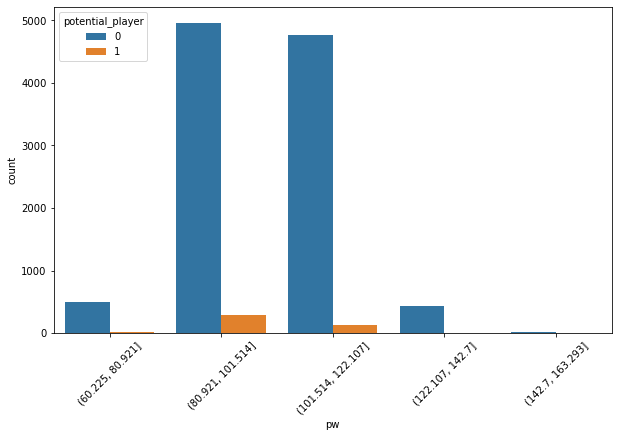

In [26]:
plt.figure(figsize=(10,6))
sns.countplot('pw',hue='potential_player',data=data)
plt.xticks(rotation=45)

sedangkan dari berat badan pemain dengan berat antara 80-101 memiliki jumlah pemain potensial yang lebih tinggi. jumlah pemain yang memiliki berat badan di antara 80-101 menjadi yang tertinggi, namun banyak pula pemain yang berada pada rentang berat badan di antara 101-122.

In [35]:
data['gp_u']=pd.cut(data['gp'],10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, &#39;(0.916, 9.4]&#39;),
  Text(1, 0, &#39;(9.4, 17.8]&#39;),
  Text(2, 0, &#39;(17.8, 26.2]&#39;),
  Text(3, 0, &#39;(26.2, 34.6]&#39;),
  Text(4, 0, &#39;(34.6, 43.0]&#39;),
  Text(5, 0, &#39;(43.0, 51.4]&#39;),
  Text(6, 0, &#39;(51.4, 59.8]&#39;),
  Text(7, 0, &#39;(59.8, 68.2]&#39;),
  Text(8, 0, &#39;(68.2, 76.6]&#39;),
  Text(9, 0, &#39;(76.6, 85.0]&#39;)])

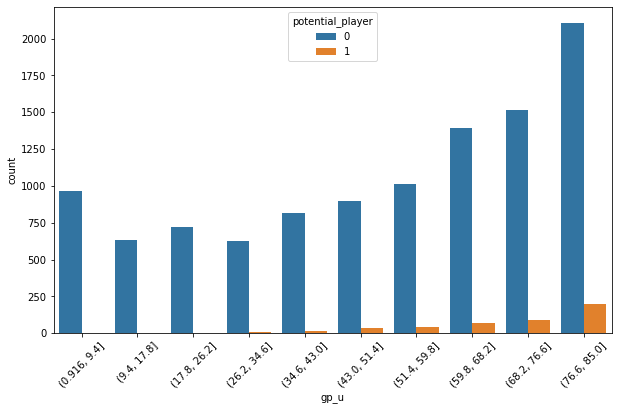

In [36]:
plt.figure(figsize=(10,6))
sns.countplot('gp_u',hue='potential_player',data=data)
plt.xticks(rotation=45)

melihat grafik di atas pemain dengan permainan di rentang 76-85 memiliki jumlah pemain yang berpotensi lebih tinggi daripada yang lain, begitu pula dengan kebanyakan pemain berkumpul pada rentang 76-85 kali bermain dalam satu musim.

pemain yang semakin banyak bermain, semakin memiliki potensi.

&lt;AxesSubplot:xlabel=&#39;pts&#39;, ylabel=&#39;potential_player&#39;&gt;

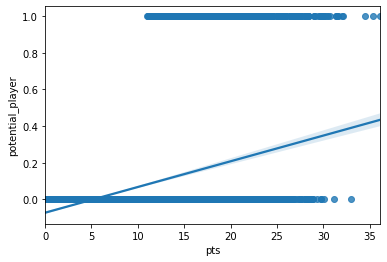

In [52]:
sns.regplot('pts','potential_player',data=data)

Dari grafik di atas terlihat bahwa jumlah poin yang diraih pemain memiliki kecenduran positif, dimana apabila pemain memiliki rata-rata poin lebih tinggi maka ia akan memiliki peluang menjadi pemain potensial

&lt;AxesSubplot:xlabel=&#39;ast&#39;, ylabel=&#39;potential_player&#39;&gt;

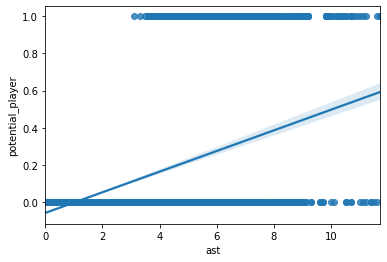

In [55]:
sns.regplot('ast','potential_player',data=data)

Dari grafik di atas terlihat bahwa jumlah assist yang diraih pemain memiliki kecenduran positif, dimana apabila pemain memiliki rata-rata assis lebih tinggi maka ia akan memiliki peluang menjadi pemain potensial

# Train_Test_Split

In [57]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

## Feature Selection & Enginering

melihat data insight di atas saya tidak akan menggunakan data yang bertipe objek

In [58]:
for i in data.columns:
    if data[i].dtype=='object':
        data.drop(i,axis=1,inplace=True)
data.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player,ph,pw,ura,gp_u
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0,"(188.468, 202.692]","(80.921, 101.514]","(31.0, 37.5]","(51.4, 59.8]"
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0,"(202.692, 216.916]","(101.514, 122.107]","(24.5, 31.0]","(9.4, 17.8]"
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0,"(202.692, 216.916]","(80.921, 101.514]","(37.5, 44.0]","(0.916, 9.4]"
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0,"(202.692, 216.916]","(80.921, 101.514]","(17.974, 24.5]","(59.8, 68.2]"
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0,"(202.692, 216.916]","(101.514, 122.107]","(31.0, 37.5]","(26.2, 34.6]"


menghapus kolom sementara untuk keperluan data visualisasi

In [64]:
data.drop(data.columns[14:],axis=1,inplace=True)

melihat korelasi dengan potential_player

In [67]:
data.corr()[['potential_player']].sort_values('potential_player',ascending=False)

,potential_player
potential_player,1.000000
ast,0.503401
pts,0.421311
ast_pct,0.344517
usg_pct,0.303417
reb,0.201826
gp,0.141288
net_rating,0.089950
ts_pct,0.084824
dreb_pct,0.015748


melihat korelasi di atas maka, saya akan menggunakan ast,pts,ast_pct,usg_pct,reb,gp, dan untuk domain knowledge saya menggunakan age, player_weight, player_height

In [68]:
X=data['ast pts ast_pct usg_pct reb gp age player_weight player_height'.split()]
y=data['potential_player']

melakukan imbalance learn

In [69]:
rus=RandomUnderSampler()
Xrus,yrus=rus.fit_resample(X,y)
ros=RandomOverSampler()
Xros,yros=ros.fit_resample(X,y)
smo=SMOTE()
Xsmo,ysmo=smo.fit_resample(X,y)

membagi train dataset dan test dataset

In [70]:
Xtr,Xts,ytr,yts=train_test_split(X,y,test_size=0.25,random_state=1)

# Machine Learning

In [72]:
etr=ExtraTreesClassifier(n_estimators=200)
etr.fit(Xtr,ytr)

ExtraTreesClassifier(n_estimators=200)

Extra Trees Classifier mirip seperti Random Forest Classifier, memiliki cara kerja yang sama seperti random Forest hanya saja Extra Trees Classifier ini tidak menggunakan threshold yang paling diskriminan melainkan dilakukan secara acak pada setiap feature dan feature yang secara random membentuk threshold terbaik akan menjadi splitting rule.

metode ini mengurangi varian sedikit lebih banyak dan meningkatkan bias sedikit lebih besar

cara kerja Extra Trees Classifier :

a. Secara acak memilih fitur 'K' dari total 'm' fitur yang ada dimana k << m 

b. pada 'k' fitur, dibentuk cabang secara acak namun tetap ada optimisasi

c. lalu dari cabang tersebut dibentuk cabang lain secara acak tetap ada optimisasi

d. langkah a-c akan diulangin sampai 'l' jumlah cabang tercapai

e. a-d akan terus diulang sampai 'n' jumlah pohon terpenuhi

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc=DecisionTreeClassifier()
dtc.fit(Xtr,ytr)

DecisionTreeClassifier()

cara kerja Decision Tree:

a. memilih atribut terbaik menggunakan perhitungan Attribute Selection Measures(ASM) untuk memecah data.

b. membuat cabang keputusan dengan memecah dataset menjadi lebih kecil dan dalam.

c. mulai membuat pohon dengan melakukan pengulangan pada setiap cabangnya sampai pada keputusan akhirnya.

In [86]:
rfc=RandomForestClassifier()
rfc.fit(Xtr,ytr)

RandomForestClassifier()

cara kerja random forest :

a. Secara acak memilih fitur 'K' dari total 'm' fitur yang ada dimana k << m

b. pada 'k' fitur, dihitunglah cabang “d” menggunakan split point yang terbaik

c. lalu dari cabang tersebut dibentuk cabang lain menggunakan best split

d. langkah a-c akan diulangin sampai 'l' jumlah cabang tercapai

e. a-d akan terus diulang sampai 'n' jumlah pohon terpenuhi

# Evaluation Metric

drop roc_auc_curv

In [75]:
def roc_auc_func(X_test,y_test,model_name):
    rfcpro=model_name.predict_proba(X_test)
    rfcprob1=rfcpro[:,1]
    fpr_rfc1, tpr_rfc1,threshold_rfc1=roc_curve(y_test,rfcprob1)
    auc_rfc=auc(fpr_rfc1,tpr_rfc1)
    plt.title(f'ROC - {model_name}')
    plt.plot(fpr_rfc1,tpr_rfc1,'b-o',label=f'auc-{model_name}: {round(auc_rfc,2)}')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.fill_between(fpr_rfc1,tpr_rfc1,0,facecolor='azure',alpha=1)
    plt.legend(loc='lower right')
    plt.show()
    return fpr_rfc1 , tpr_rfc1, threshold_rfc1, auc_rfc

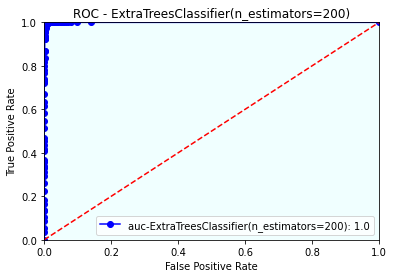

In [92]:
fpr_etr,tpr_etr,thres_etr,auc_etr=roc_auc_func(Xts,yts,etr)

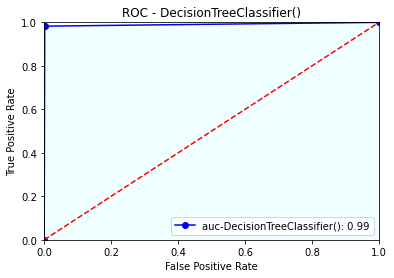

In [93]:
fpr_dtc,tpr_dtc,thres_dtc,auc_dtc=roc_auc_func(Xts,yts,dtc)

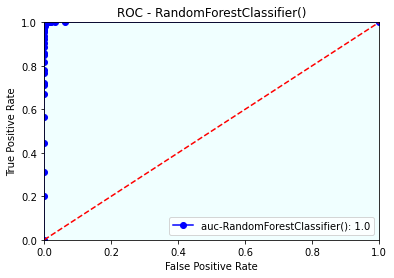

In [94]:
fpr_rfc,tpr_rfc,thres_rfc,auc_rfc=roc_auc_func(Xts,yts,rfc)

In [97]:
from sklearn.metrics import confusion_matrix

In [100]:
list_model_rfc=[[yts,etr.predict(Xts),fpr_etr,tpr_etr],[yts,dtc.predict(Xts),fpr_dtc,tpr_dtc],[yts,rfc.predict(Xts),fpr_rfc,tpr_rfc]]
array_model=[np.array(['Extra Trees','Desicion Trees','Random Forest'])]
fill_data={'accuracy score': [], 'precision score': [],'recall score':[],'f1 score':[],'ROC-AUC score':[],'True Positive':[],'True Negative':[], 'False Positive':[],'False Negative':[]}
for i in list_model_rfc:
    t0,t1=confusion_matrix(i[0],i[1])
    fill_data['accuracy score'].append(accuracy_score(i[0],i[1]))
    fill_data['precision score'].append(precision_score(i[0],i[1]))
    fill_data['recall score'].append(recall_score(i[0],i[1]))
    fill_data['f1 score'].append(f1_score(i[0],i[1]))
    fill_data['ROC-AUC score'].append(auc(i[2],i[3]))
    fill_data['True Positive'].append(t1[1])
    fill_data['True Negative'].append(t0[0])
    fill_data['False Positive'].append(t0[1])
    fill_data['False Negative'].append(t1[0])
model_comparation=pd.DataFrame(fill_data,index=array_model)

In [101]:
model_comparation

,accuracy score,precision score,recall score,f1 score,ROC-AUC score,True Positive,True Negative,False Positive,False Negative
Extra Trees,0.994618,0.946429,0.921739,0.933921,0.999520,106,2666,6,9
Desicion Trees,0.997847,0.965812,0.982609,0.974138,0.990556,113,2668,4,2
Random Forest,0.998924,0.991228,0.982609,0.986900,0.999967,113,2671,1,2


fokus dari kasus ini adalah mengurangi False Negative. Pemain yang berpotensi, namun diprediksi tidak berpotensi akan menyebabkan kerugian bagi sebuah klub karena tidak mendapatkan pemain yang berpotensi.

melihat evaluasi model di atas, False Negative terkecil adalah random forest begitu pula dengan false positif yang rendah pula, presisi score , recall, f1 score, accuracy juga mengacu kepada random forest

# Model Optimization

melihat threshold yang dapat digunakan untuk optimalisasi

In [103]:
c=pd.DataFrame({'fpr':fpr_rfc,'tpr':tpr_rfc,'Threshold':thres_rfc,'AUC score':auc_rfc})
c

,fpr,tpr,Threshold,AUC score
0,0.000000,0.000000,2.00,0.999967
1,0.000000,0.200000,1.00,0.999967
2,0.000000,0.313043,0.99,0.999967
3,0.000000,0.443478,0.98,0.999967
4,0.000000,0.565217,0.97,0.999967
5,0.000000,0.669565,0.96,0.999967
6,0.000000,0.713043,0.95,0.999967
7,0.000000,0.721739,0.94,0.999967
8,0.000000,0.765217,0.93,0.999967
9,0.000000,0.782609,0.92,0.999967


In [137]:
pred_030=[0 if x[1]<0.27 else 1 for x in rfc.predict_proba(Xts)]
confusion_matrix(yts,pred_030)

array([[2668,    4],
       [   0,  115]], dtype=int64)

Menggunakan Threshold 0.27 membuat false negative menjadi 0, namun false positive menjadi 4.

# Mencari pemain baru

In [115]:
pembar=pd.read_csv('new_players.csv')
pembar.head()

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


menyamakan feature

In [116]:
predict_set=pembar.copy()
predict_set.drop(['Unnamed: 0'],axis=1,inplace=True)
for i in predict_set.columns:
    if predict_set[i].dtype=='object':
        predict_set.drop(i,axis=1,inplace=True)
predict_set.head()

,player_id,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,1,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,2,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,3,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,4,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,5,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [117]:
Xpem=predict_set['ast pts ast_pct usg_pct reb gp age player_weight player_height'.split()]

In [118]:
pred=[0 if x[1]<0.27 else 1 for x in rfc.predict_proba(Xpem)]
pembar['potential_player']=pred

# Hasil model untuk klasifikasi pemain

In [119]:
pembar

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0
